In [1]:
reset -fs

![Loan](./figures/neonbrand-AOJGuIJkoBc-unsplash.jpg)

Photo by NeONBRAND on Unsplash

# Background and feature understanding

## About Lending Club

LendingClub is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform.

***Lending Club enables borrowers to create unsecured personal loans between 1,000 USD and 40,000 USD. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.***
[Wikipedia - Lending club](https://en.wikipedia.org/wiki/LendingClub)

For this project we chose a dataset from Lending Club approved personal loans between 2007 and 2011. The data can be found on www.lendingclub.com. The purpose of the analysis is to reduce defaults, improve profitability and help the company and investors determine interest rates. We will use machine learning models to analyze credit risk as a binary classification problem.

## About the data

### Description of the features in the data
(feature groups: payment behavior etc.)

For further details please see EDA-Chapter or the following spreadsheet with explanations:

[Lending Club - Feature Explanation](./data/feature_info_as_table.ods)

# Setting up the Notebook

## import of relevant modules

In [2]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

## Macros

In [3]:
DATA_FOLDER = './data/'
FIG_FOLDER = './figures/'

## Utile Functions

### Plotting functions

In [4]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)


In [49]:
# make general plots to examine each feature
def plot_var(df,col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='target', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['target'].value_counts(normalize=True)[:,0]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'target', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='target', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

## Save figure

In [5]:
def save_fig(sec_name, fig_name, tight_layout=True):
    path = os.path.join(FIG_FOLDER , sec_name + '_'  + fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=600)

# Cleaning

## cleaning 1: result is  '../data/clean_pass_01p1.pkl'

## cleaning outlier etc. 
cleaning_pass_02

## cleaning date type

In [54]:
def time_converter(elem):
    month_to_num = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06',
                    'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
    temp_elem = elem.split('-')
    val = '-'.join([month_to_num[temp_elem[0]],temp_elem[1]])
    date = pd.to_datetime(val)
    return date

# Target design

In [6]:
# countplot 

# Feature Engineering

## Employment_title_ident

## feature importance test

# EDA

## Initial Data import

In [7]:
# import the cleaned data
df_eda = pd.read_pickle(DATA_FOLDER + 'clean_pass_01p2_Ptarget.pkl')
pd.options.display.max_columns = None

## Overview

In [8]:
# How many data to we have
print('We see {} rows and {} cols in the data'.format(df_eda.shape[0],df_eda.shape[1]))

We see 38818 rows and 41 cols in the data


In [9]:
# Let's have a short look at the head of the data
df_eda.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,has_made_pymnt,target
1,2500.0,2500.0,2500.0,60m,0.1527,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.0,0.0,Apr-1999,5.0,3.0,0.0,1687.0,0.094,4.0,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-2013,0,1,0.0
3,10000.0,10000.0,10000.0,36m,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.0,0.0,Feb-1996,1.0,10.0,0.0,5598.0,0.210,37.0,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-2016,0,1,1.0
5,5000.0,5000.0,5000.0,36m,0.0790,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.2,0.0,Nov-2004,3.0,9.0,0.0,7963.0,0.283,12.0,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-2016,0,1,1.0


In [10]:
# Let's have a short look at the end of the data
df_eda.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,has_made_pymnt,target
42454,5700.0,5700.0,1450.0,36m,0.1343,193.26,E,E1,"PEER Center, Inc.",5.0,RENT,65000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,333xx,FL,18.22,0.0,Nov-2004,3.0,15.0,1.0,3023.0,0.126,17.0,0.0,0.0,6957.002153,1769.76,5700.0,1257.00,0.0,0.0,0.0,198.59,Jun-2016,1,1,1.0
42466,6000.0,6000.0,1025.0,36m,0.1280,201.60,D,D4,Securitas Security Services,8.0,RENT,57000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,547xx,WI,15.20,2.0,Nov-1989,4.0,13.0,1.0,13622.0,0.797,31.0,0.0,0.0,7322.221721,1250.88,6000.0,1262.22,60.0,0.0,0.0,108.03,May-2011,1,1,1.0
42474,13000.0,13000.0,700.0,36m,0.1091,425.04,C,C3,"LendingTree, LLC",2.0,MORTGAGE,62000.0,Not Verified,Aug-2007,Does not meet the credit policy. Status:Fully ...,debt_consolidation,282xx,NC,20.00,0.0,Nov-1993,4.0,23.0,1.0,13748.0,0.502,53.0,0.0,0.0,15301.293803,823.92,13000.0,2301.29,0.0,0.0,0.0,426.53,Jun-2011,1,1,1.0


## Interest rate and default rate over time

To improve the understanding of the topic it seems to be good to have a look on to the 'normal' interest rates for loans and a rate of credit defaults outside of Lending club

In [11]:
# credit default rate US from 2007 to 2011
# source: https://www.federalreserve.gov/datadownload/Choose.aspx?rel=CHGDEL
cdr_us = pd.read_csv('./data/DRALACBN.csv').rename(columns={'DATE':'date','DRALACBN':'default_rate'})
time_df = pd.read_csv(DATA_FOLDER + 'loans_2007.csv')

/Users/torben/opt/anaconda3/envs/nf2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'US Credit Default Rate 2007 - 2011')

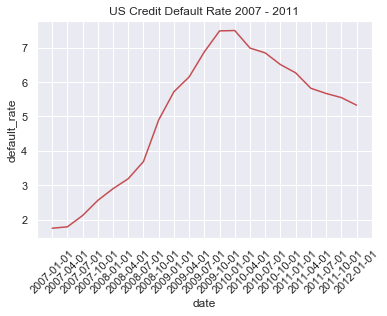

In [12]:
# plotting the cdr 
f=sns.lineplot(x='date',y='default_rate',data=cdr_us,color='r')
plt.xticks(rotation=45);
plt.title('US Credit Default Rate 2007 - 2011')

## annual_inc

In [13]:
df_eda.annual_inc.describe().round(2)

count      38818.00
mean       69161.69
std        64415.24
min         1896.00
25%        41000.00
50%        59418.00
75%        82307.25
max      6000000.00
Name: annual_inc, dtype: float64

Saving figure annual_inc_boxplot_by_target


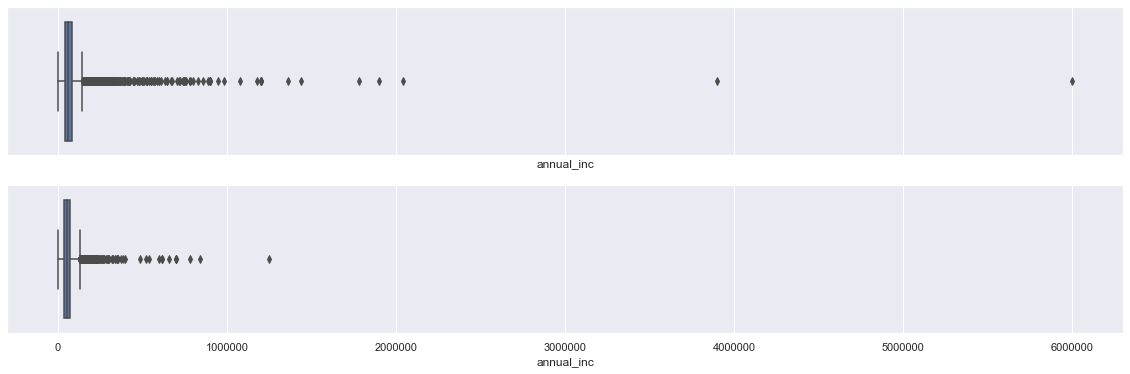

<Figure size 1440x216 with 0 Axes>

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,6))
plt.figure(figsize=(20,3))
sns.boxplot(x='annual_inc',data=df_eda.query('target==1'),ax=ax1)
sns.boxplot(x='annual_inc',data=df_eda.query('target==0'),ax=ax2)
save_fig('eda','annual_inc_boxplot_by_target')

The Annual income ranges from 1,896 USD to 6 Million USD with a mean annual income of around 70,000 USD
We see a lot of outliers in the boxplot, they will be handled afterwards

In [15]:
df_eda.groupby('target').annual_inc.describe().round()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0.0,5842.0,63670.0,49235.0,3600.0,38000.0,54000.0,75000.0,1250000.0
1.0,32976.0,70135.0,66699.0,1896.0,42000.0,60000.0,84000.0,6000000.0


## loan_amnt

"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [16]:
df_eda.loan_amnt.describe().round(2)

count    38818.00
mean     11010.23
std       7280.11
min        500.00
25%       5300.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64

The Loan Amount ranges from min. 500 USD to max. 35,000 USD with a mean of around 11,000 USD

In [17]:
df_eda.groupby('target')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0.0,5842.0,11965.285861,7936.351894,600.0,5600.0,10000.0,16000.0,35000.0
1.0,32976.0,10841.029840,7144.408536,500.0,5200.0,9600.0,15000.0,35000.0


Saving figure loan_amount_dist


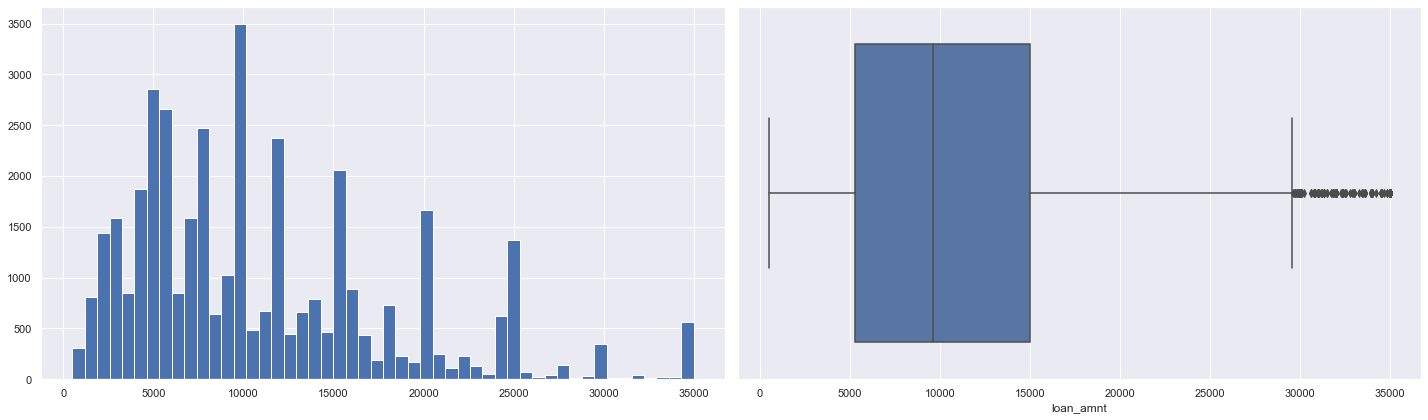

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
fig=df_eda.loan_amnt.hist(bins=50,ax=ax1)
fig=sns.boxplot(x='loan_amnt',data=df_eda,ax=ax2)
save_fig('eda', 'loan_amount_dist')

## Distribution of term

"The number of payments on the loan. Values are in months and can be either 36 or 60."

In [19]:
df_eda.term.value_counts(normalize=True)

36m    0.754701
60m    0.245299
Name: term, dtype: float64

Saving figure default_rate_by_term


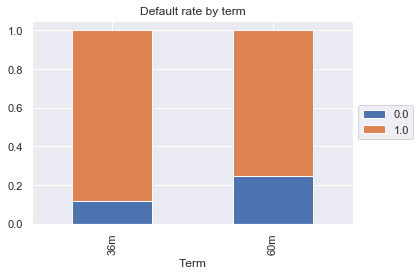

In [20]:
term = pd.crosstab(df_eda.term, df_eda.target)
term = term.div(term.sum(1).astype(float),axis=0)
term.plot(kind='bar', stacked=True, title='Default rate by term')
plt.xlabel('Term')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
save_fig('eda','default_rate_by_term')

In [21]:
df_eda.groupby('term').target.value_counts(normalize=True)

term  target
36m   1.0       0.881417
      0.0       0.118583
60m   1.0       0.751313
      0.0       0.248687
Name: target, dtype: float64

We can see, that 75% of the loans have a period of three years while the other 25% have to be paid back in 60 month or 5 years.
The default rate for the 60month period is a lot higher than for 36month (25% vs. 12%)

## Exploring the Grading System

Saving figure grade_distribution


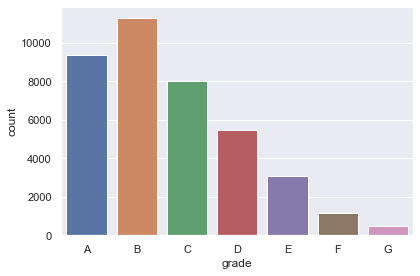

In [22]:
sns.countplot(x='grade',data=df_eda.sort_values('grade'))
save_fig('eda','grade_distribution')

Saving figure default_rate_by_grade


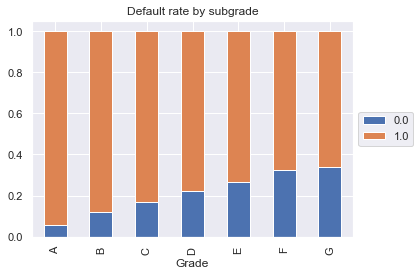

In [23]:
target = pd.crosstab(df_eda.grade, df_eda.target)
target = target.div(target.sum(1).astype(float),axis=0)
target.plot(kind='bar', stacked=True, title='Default rate by subgrade')
plt.xlabel('Grade')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
save_fig('eda','default_rate_by_grade')

Saving figure grade_count_by_target


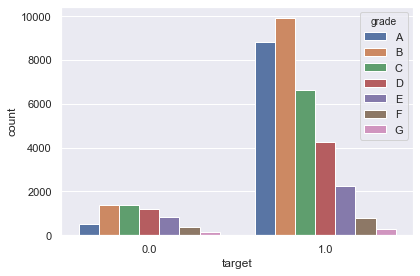

In [28]:
sns.countplot(x='target',data=df_eda.sort_values('grade'), hue='grade')
save_fig('eda','grade_count_by_target')

### Grade vs. subgrade

Saving figure int_rate_over_subgrade


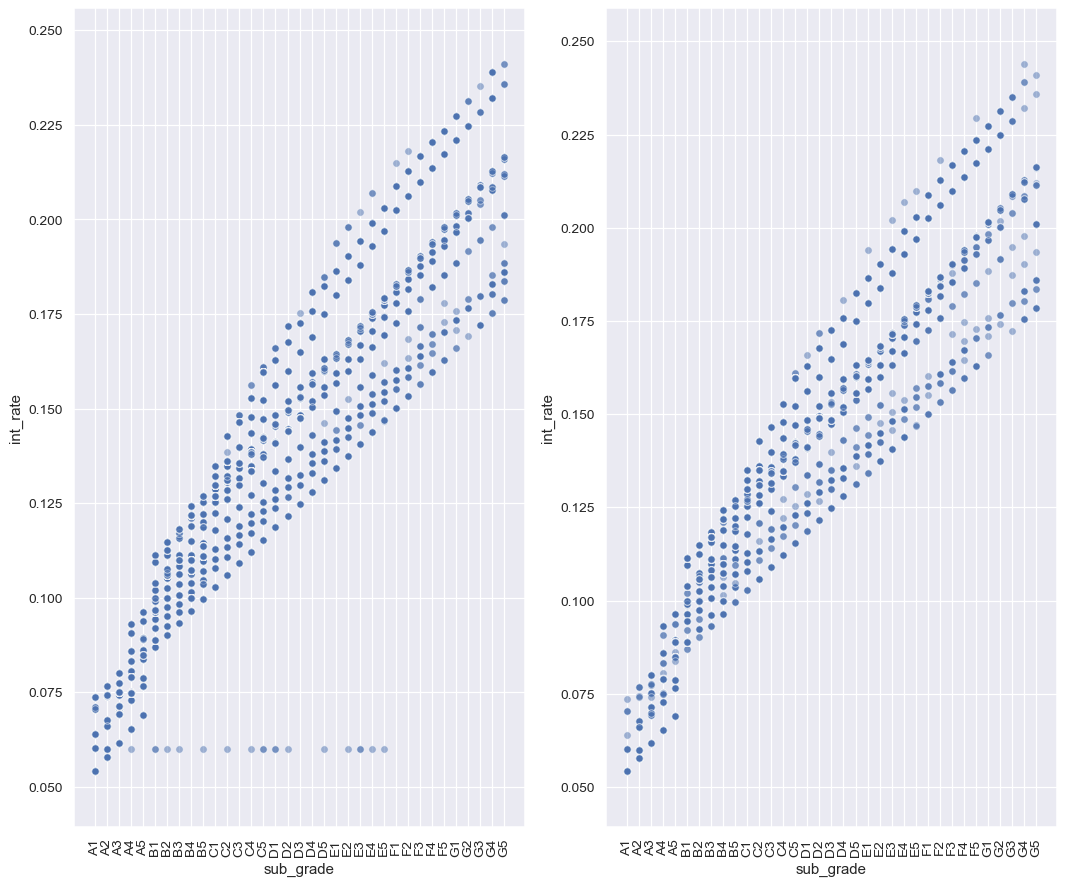

In [30]:
# predicting interest_rate 
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,10), dpi=90)
g= sns.scatterplot(x='sub_grade',y='int_rate',data=df_eda.query('target==1').sort_values('sub_grade'),alpha=.5,ax=ax1)
g= sns.scatterplot(x='sub_grade',y='int_rate',data=df_eda.query('target==0').sort_values('sub_grade'),alpha=.5,ax=ax2)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)
save_fig('eda','int_rate_over_subgrade');

We can see some outliers: Very low interest rates even if the grade is not that good

### Reverse Engineering Grade System (Try)

In [ ]:
# heatmap of subgrades to determine highly correlated features
### DOES NOT WORK SO FAR: DUMMIES for Grade!
k = 10 #number of variables for heatmap
cols = df_eda.corr().nlargest(k, 'grade')['grade'].index
cm = np.corrcoef(df_eda[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.savefig('figures/price_correlation_matrix_grade')

### do the gradesystem work

In [31]:
# default rate by grade: should be higher by worse grades
loan_grade = ['target', 'grade']
pd.crosstab(df_eda[loan_grade[0]], df_eda[loan_grade[1]], normalize='columns')

grade,A,B,C,D,E,F,G
target,,,,,,,
0.0,0.057024,0.121938,0.17012,0.222019,0.26756,0.32528,0.339827
1.0,0.942976,0.878062,0.82988,0.777981,0.73244,0.67472,0.660173


As we can see from the table above and the figure in 6.7 the grading system of Lending Club seems to work generally as the default rate is gettting higher if the grade is getting worse

## Influence of location

In the dataset we see two features which are related to the location of the member:
* first 3 digits of the zipcode
* state, where the borrower is located

At this state we will drop zip code as it has a lot of different features and keep the state


In [32]:
print('Unique values in zipcode: ',df_eda.zip_code.nunique())
print('Unique values in state: ', df_eda.addr_state.nunique())

Unique values in zipcode:  831
Unique values in state:  50


Saving figure default_rate_by_state


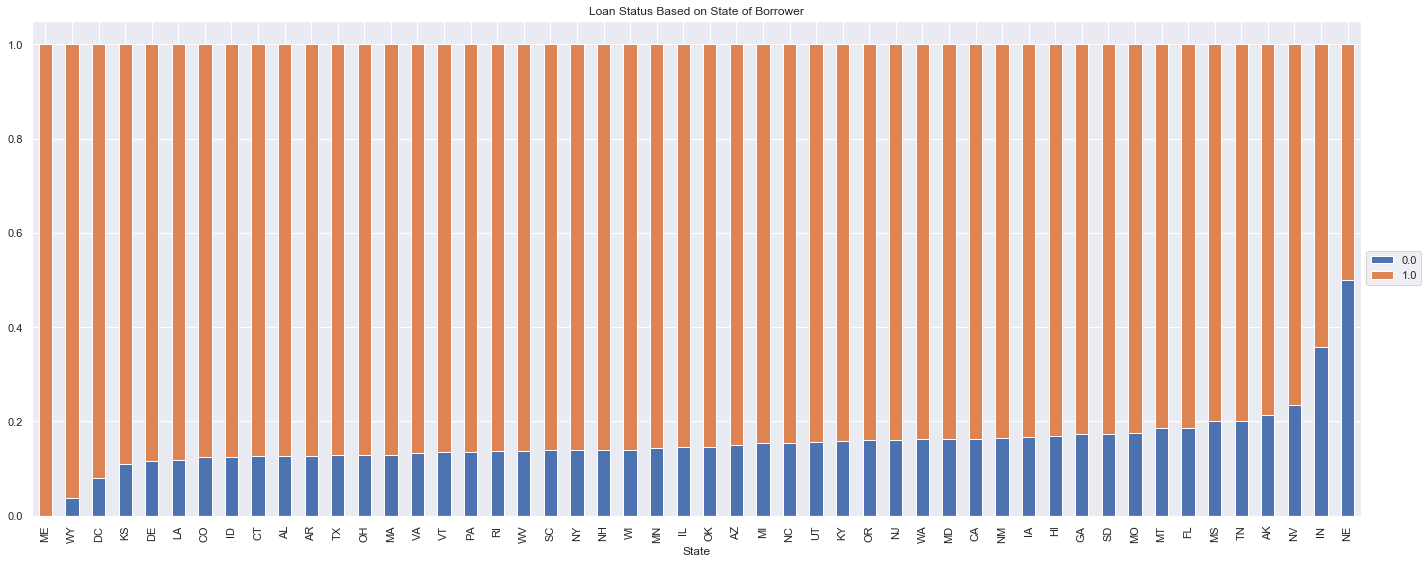

In [33]:
state = pd.crosstab(df_eda.addr_state , df_eda.target)
state = state.div(state.sum(1).astype(float), axis=0).sort_values(0)
state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,8))
plt.xlabel('State')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_fig('eda','default_rate_by_state');

Saving figure number_of_defaulted_loans_by_state


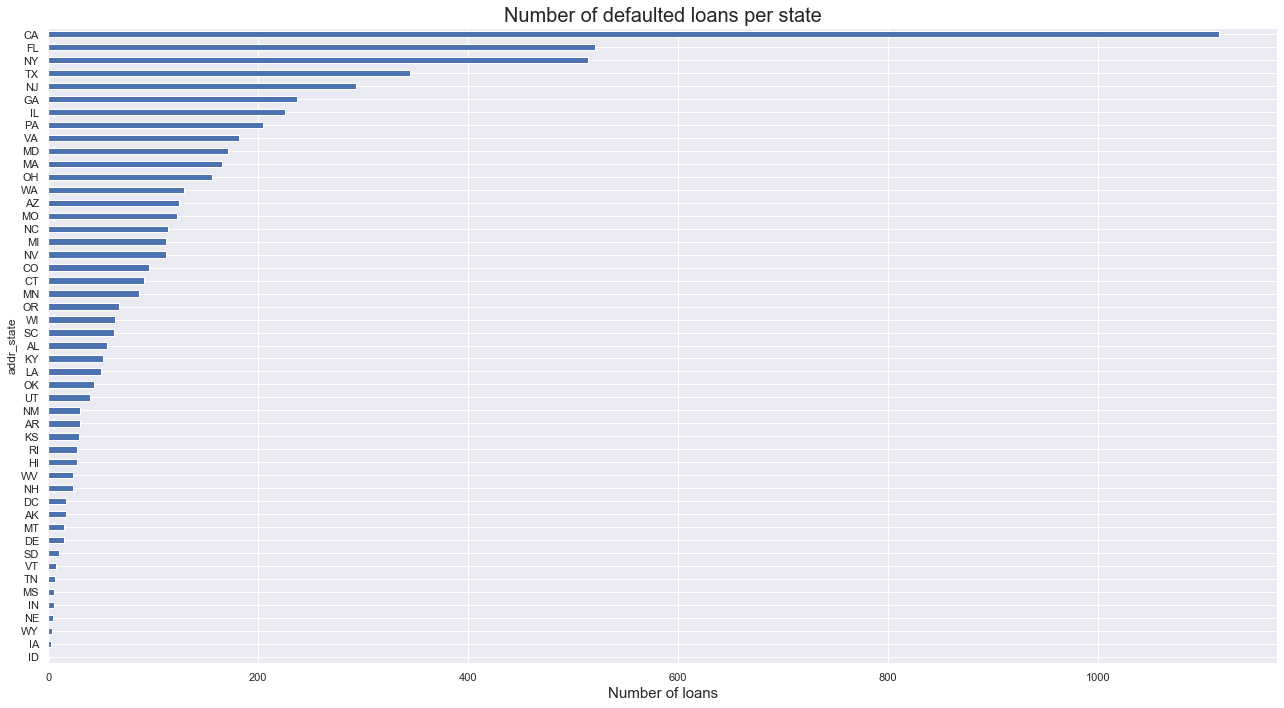

In [34]:
fig = plt.figure(figsize=(18,10))
df_eda[df_eda['target']==0].groupby('addr_state')['target'].count().sort_values().plot(kind='barh')
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20)
save_fig('eda','number_of_defaulted_loans_by_state');

It can be seen that there seems to be an impact of the state where a member comes from. But as the number of loans differ a lot by state this needs to be examined in more detail to to able to be more precise on this

## verification_status vs. annual_inc

Now let's have a short look on the verification status. It says if the income statet by the member is verified by Lending club or a third source

In [35]:
df_eda.groupby('verification_status').annual_inc.describe()

,count,mean,std,min,25%,50%,75%,max
verification_status,,,,,,,,
Not Verified,17177.0,61651.798286,58297.561901,1896.0,38400.0,52800.0,73909.00,3900000.0
Source Verified,9543.0,67942.557270,83673.775690,4800.0,39996.0,55000.0,79386.00,6000000.0
Verified,12098.0,80786.056437,52439.619698,6000.0,50000.0,70000.0,97691.25,1250000.0


In [36]:
df_eda.groupby('verification_status').target.value_counts(normalize=True)

verification_status  target
Not Verified         1.0       0.862083
                     0.0       0.137917
Source Verified      1.0       0.850257
                     0.0       0.149743
Verified             1.0       0.831046
                     0.0       0.168954
Name: target, dtype: float64

In [37]:
df_eda.verification_status.value_counts(normalize=True)

Not Verified       0.442501
Verified           0.311660
Source Verified    0.245840
Name: verification_status, dtype: float64

Saving figure def_rate_by_verif


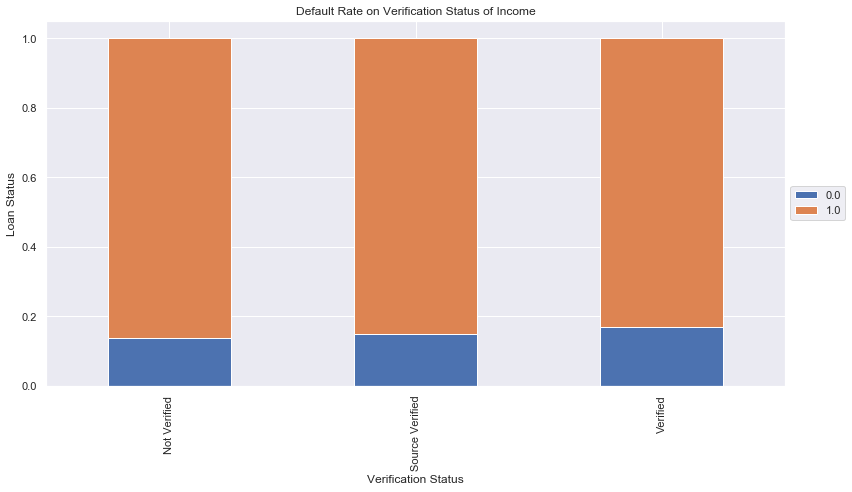

In [42]:
verif = pd.crosstab(df_eda.verification_status , df_eda.target)
verif = verif.div(verif.sum(1).astype(float), axis=0).sort_values(0)
verif.plot(kind='bar', stacked=True, title='Default Rate on Verification Status of Income', figsize=(12,7))
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_fig('eda','def_rate_by_verif');

## home ownership

"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [45]:
df_eda.home_ownership.value_counts(normalize=True)

RENT        0.481838
MORTGAGE    0.443737
OWN         0.071024
OTHER       0.003400
Name: home_ownership, dtype: float64

In [46]:
df_eda.groupby('home_ownership').target.value_counts(normalize=True)

home_ownership  target
MORTGAGE        1.0       0.858229
                0.0       0.141771
OTHER           1.0       0.772727
                0.0       0.227273
OWN             1.0       0.851650
                0.0       0.148350
RENT            1.0       0.841692
                0.0       0.158308
Name: target, dtype: float64

Saving figure impact_home_owner


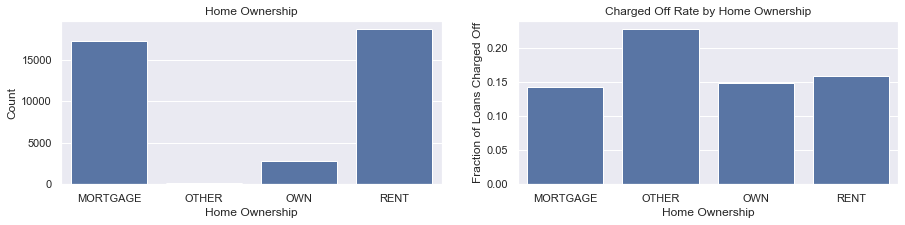

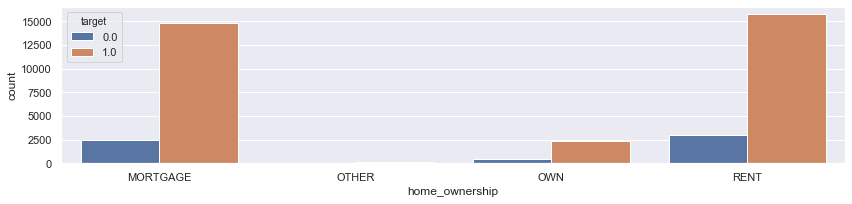

In [51]:
plot_var(df_eda, 'home_ownership', 'Home Ownership', continuous=False)
save_fig('eda','impact_home_owner')

## financial impact of default

In [ ]:
# loan_amnt vs. default rate
# funded_amnt - total_rec_prncp
# could be done

# Data Cleaning 2

Further Cleaning needed after the Exploratory Data Analysis

In [55]:
df_toclean2 = pd.read_pickle(DATA_FOLDER + 'clean_pass_01p1_PFemp_ident.pkl')

## Outlier

### Outlier Detection

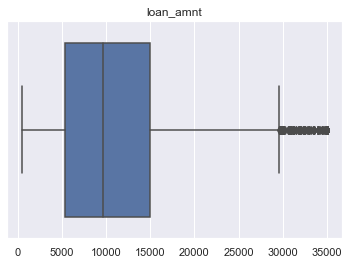

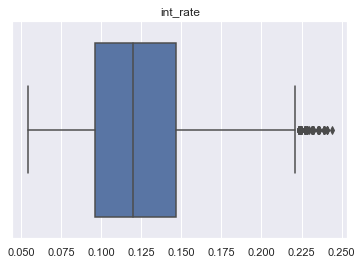

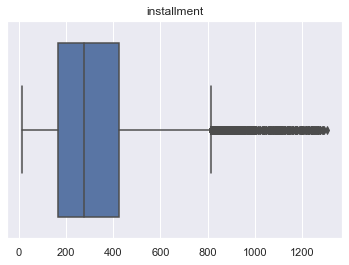

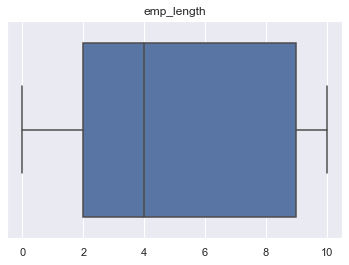

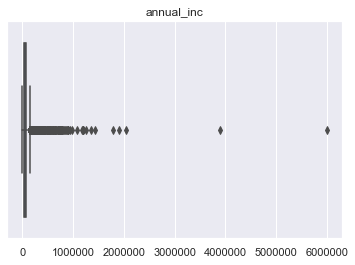

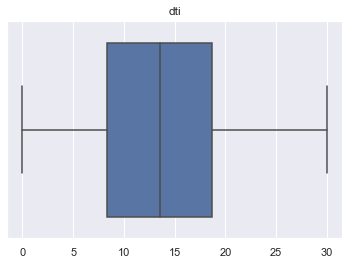

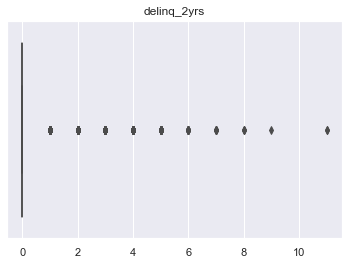

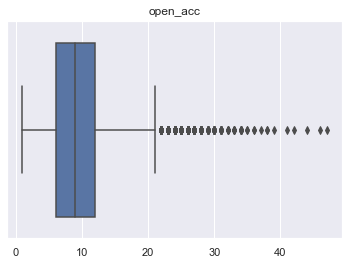

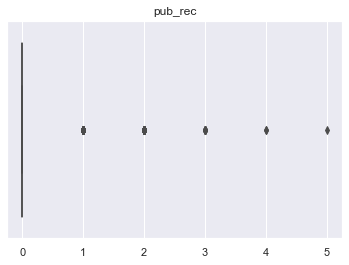

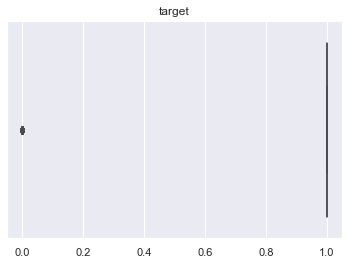

In [58]:
# for plotting purposes let's drop some columns
df_outl = df_toclean2.drop(labels=['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int',
                     'total_rec_late_fee', 'inq_last_6mths','revol_bal', 'revol_util',
                     'total_acc', 'out_prncp','out_prncp_inv','collection_recovery_fee',
                     'recoveries','last_pymnt_amnt','funded_amnt','funded_amnt_inv'],axis=1)

for column in df_outl.select_dtypes(include='float'):
    plt.figure()
    plt.title(column)
    sns.boxplot(x=[column],data=df_toclean2)

### Outlier Handling

#### annual_inc

As Already seen in the EDA annual_inc has heavy outliers. So let's deal with them

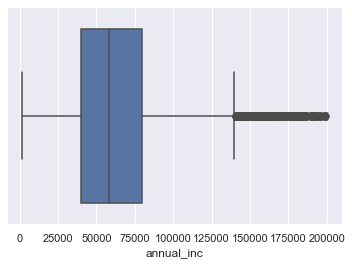

In [59]:
sns.boxplot(x='annual_inc', data=df_toclean2.query('annual_inc<200000'))

Saving figure income_wo_outl


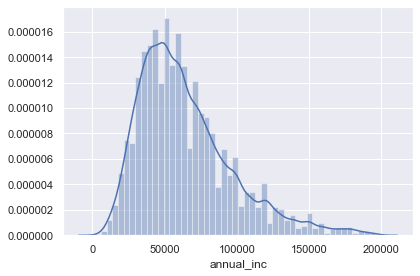

In [65]:
sns.distplot(df_toclean2.query('annual_inc<200000').annual_inc)
save_fig('clean2','income_wo_outl');

In [61]:
df_toclean2.query('annual_inc>200000').annual_inc.count()

591

In [63]:
print((df_toclean2.query('annual_inc>200000').target.count()/df_toclean2.target.count()*100).round(2),'% of the data have an income > 200.000$')
print('Which means in total:',df_toclean2.query('annual_inc>200000').target.count())

1.52 % of the data have an income > 200.000$
Which means in total: 591


Annual income over 200.000 USD will be dropped for further modelling. Loss of 1.52 % of the data

In [64]:
df_clean2 = df_toclean2.query('annual_inc<200000')

## Other stuff

### low int_rate despite that the grade is bad

In the data we can see some low interest rates (below 7.5%) which does not belong to a member of Grade A.
These Columns could lead to wrong assumptions of the model. In this case the int_rate does absolutely not fit to the grade. As there are only 18 values which all belomgs to member who have fully paid, these will be dropped.

In [69]:
df_toclean2.query('grade!="A" and int_rate < 0.075').target.value_counts()

1.0    18
Name: target, dtype: int64

In [72]:
df_clean2 = df_toclean2.drop(index=df_toclean2.query('grade!="A" and int_rate < 0.075').index)

### home_ownership

Let's have a further look onto the home_ownership. The 'Other' Category seems to be really underrepresented

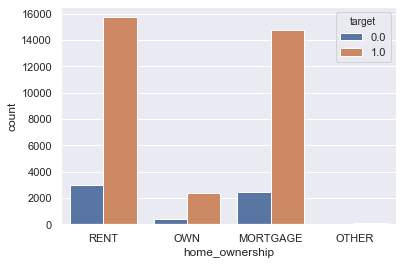

In [73]:
sns.countplot(x='home_ownership',data=df_toclean2,hue='target')

In [75]:
print(df_toclean2.groupby('home_ownership').target.count())
df_toclean2.groupby('home_ownership').target.mean()

home_ownership
MORTGAGE    17225
OTHER         132
OWN          2757
RENT        18704
Name: target, dtype: int64


home_ownership
MORTGAGE    0.858229
OTHER       0.772727
OWN         0.851650
RENT        0.841692
Name: target, dtype: float64

In [76]:
# data loss if these will be skipped
132/df_toclean2.target.count()*100

0.3400484311401927

From 0.34 % it will be difficult to predict anything so the other class will be dropped as the credit default rate ich a lot worse than in the other groups

In [77]:
df_clean2 = df_toclean2.drop(index=df_toclean2.query('home_ownership=="OTHER"').index)

In [78]:
df_clean2.query('target==0').groupby('home_ownership').target.count()

home_ownership
MORTGAGE    2442
OWN          409
RENT        2961
Name: target, dtype: int64

# Feature Engineering 2

## Location feature

In [ ]:
# state/credit ratio
# --> how many credits and better bad-loan ratio
### future work

## final feature importance

# Prediction Model

## Metric / Score

In [ ]:
# Precision

# Specificity / Selectivity
# try to avoid FP and be precise on TP
# Play safe: 
# Under the assumption that you will always find members/borrowers to make the investors happy

# Log loss: Default rate as probability --> could be a good way????
# Log loss

## Metric overview function
Model_Vali()
* one for core score
* one verbose

## Preprocessing

### Scaling / Pipeline 

###  Train-Test-Split

## Different Models

### Baseline: Logistics Regression

### Naive Bayes

### Random Forest

### Gradient Boost

### XGBoost

### Summary: Model selection

# Model application

In [ ]:
# What to do with the prediction
# Calculate int_rate...

# Conclusion

# Future Work

A lot